In [1]:
import os
import pandas as pd

from project.input.resources import resources_data
from project.model import get_inputs
from project.utils import subplots_attributes, subplots_pie, plot_attribute, plot_attribute2attribute
from project.utils import cumulated_plot,cumulated_plots

ModuleNotFoundError: No module named 'project'

In [3]:
path = 'output/static'
if not os.path.isdir(path):
    os.mkdir(path)

In [24]:
output = 'output/img'
if not os.path.isdir(output):
    os.mkdir(output)

## Loading inputs
Inputs come from the Res-IRF reference scenario.

In [42]:
stock = pd.read_csv('output/building_stock_sdes2018_aggregated.csv', index_col=[0, 1, 2, 3, 4, 5]).squeeze()
stock.index.names = ['Housing type', 'Performance', 'Energy', 'Occupation status', 'Income owner', 'Income tenant']
stock.head()

Housing type   Performance  Energy       Occupation status  Income owner  Income tenant
Multi-family   A            Electricity  Social-housing     D10           D1               4162.321113
Single-family  A            Electricity  Social-housing     D10           D1               1618.652411
Multi-family   A            Electricity  Owner-occupied     D1            D1               1154.718085
Single-family  A            Electricity  Owner-occupied     D1            D1               5032.777538
Multi-family   A            Electricity  Social-housing     D10           D2               4298.192125
Name: Stock buildings, dtype: float64

## General description

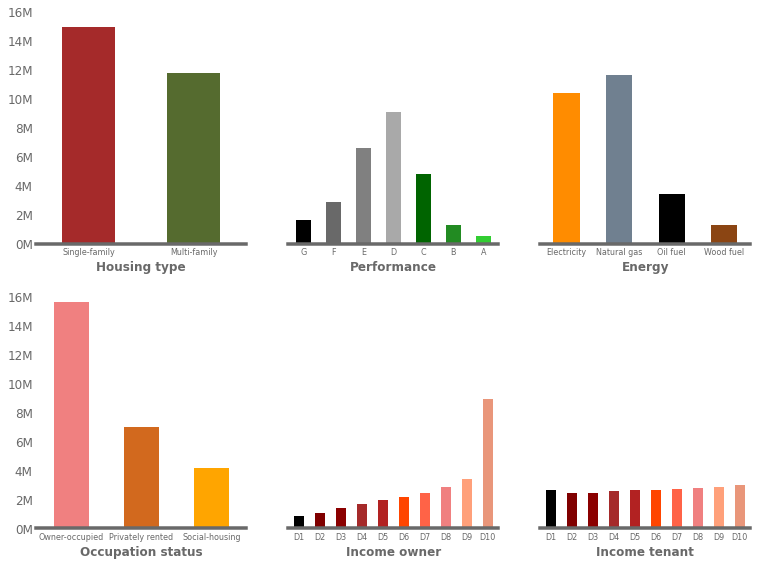

In [43]:
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True)
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True, save=os.path.join(output, 'stock_sdes2018_all.png'))

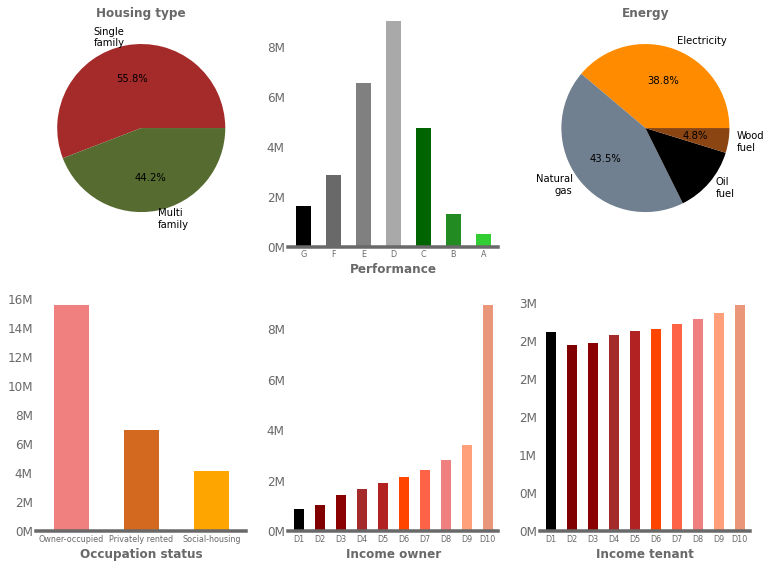

In [44]:
subplots_pie(stock, dict_order=resources_data['index'], pie=['Housing type', 'Energy', 'Occupancy status'], dict_color=resources_data['colors'], percent=False)

In [45]:
plot_attribute(stock, attribute='Performance', dict_order=resources_data['index'], percent=False, dict_color=resources_data['colors'], width=0.4,
               save='output/img/stock_sdes2018_energy_performance.png', figsize=(8.0, 6.0))

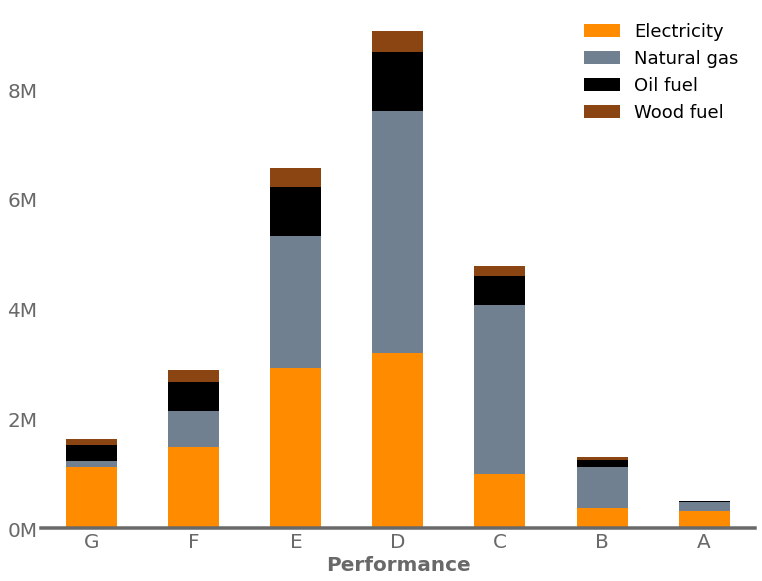

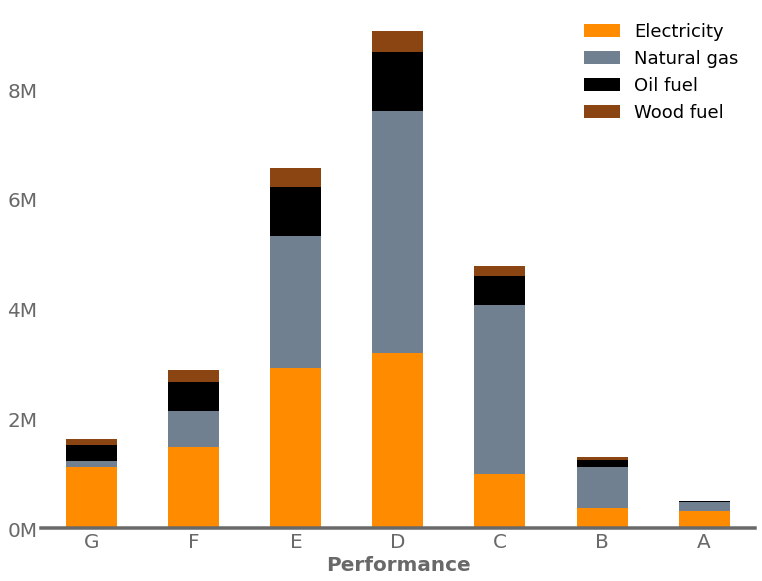

In [46]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'])
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False)
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, save='output/img/stock_sdes2018_dpe_energy.png')

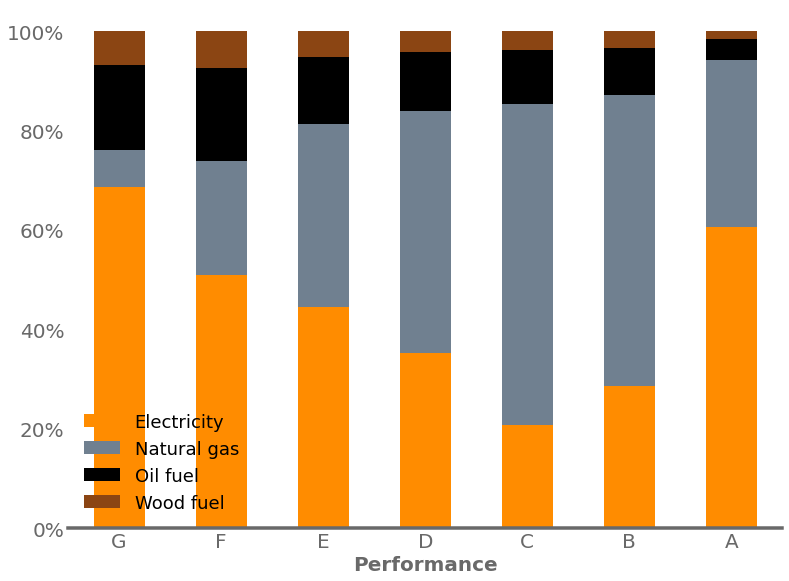

In [47]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True)

### Relation occupation status - building performance

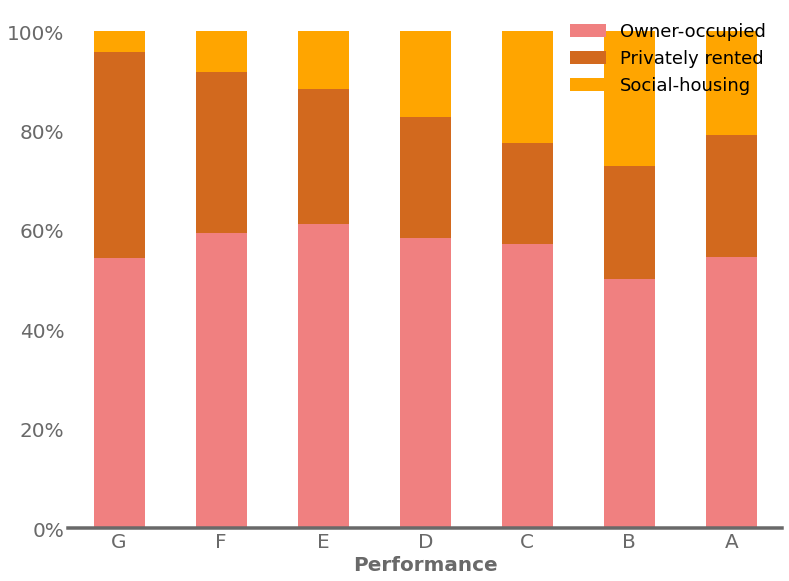

In [52]:
plot_attribute2attribute(stock, 'Performance', 'Occupation status', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True, save='output/img/stock_occupation_performance.png')
plot_attribute2attribute(stock, 'Performance', 'Occupation status', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True)

### Relation income - building performance

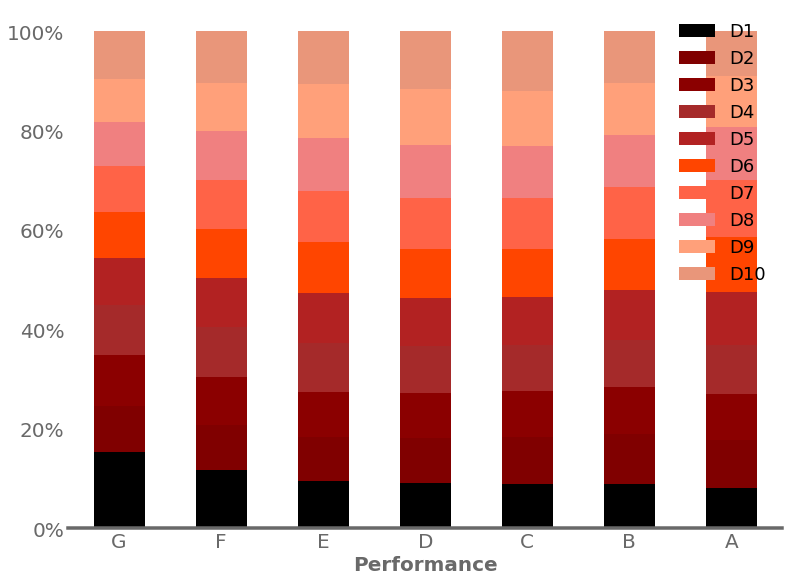

In [53]:
plot_attribute2attribute(stock, 'Performance', 'Income tenant', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True, save='output/img/stock_income_performance.png')
plot_attribute2attribute(stock, 'Performance', 'Income tenant', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True)

### Table

Income by energy performance certificate

In [31]:
stock.groupby(['Performance', 'Income tenant']).sum().unstack('Income tenant')

Income tenant,D1,D10,D2,D3,D4,D5,D6,D7,D8,D9
Performance,,,,,,,,,,
A,41162.800019,4.516579e+04,48277.224781,47686.320045,49377.100992,54362.258152,55532.378361,57699.277044,54261.440332,5.246379e+04
B,114226.069425,1.330892e+05,130432.038126,121609.800205,123689.516052,129050.173425,132859.912215,135728.727770,135236.067521,1.350621e+05
C,425894.853719,5.704859e+05,454755.696505,433935.799986,446985.553425,457277.878224,468164.511737,482911.663955,504633.463215,5.290176e+05
D,820451.689685,1.059598e+06,825239.468154,814359.363326,859947.046613,880224.814029,898993.239883,926274.878096,962845.619907,1.010485e+06
E,622811.075295,7.008113e+05,576391.668473,604458.177365,648290.137561,660102.526705,666649.640778,677883.736335,694152.372614,7.092550e+05
F,338283.198862,2.983945e+05,259380.620572,279037.970771,290303.593344,287417.275833,282910.412155,283661.949708,284159.104378,2.831976e+05
G,247387.183029,1.542871e+05,153049.433060,166072.249461,161114.051507,155418.327977,149655.781619,149861.593011,144720.005713,1.401195e+05


In [37]:
df = (stock.groupby(['Performance', 'Income tenant']).sum().unstack('Income tenant').T / stock.groupby(['Performance', 'Income tenant']).sum().unstack('Income tenant').sum(axis=1)).T
df.loc[:, resources_data['index']['Income owner']].to_csv('output/img/stock_income_performance_table.csv')

Energy by energy performance certificate

In [23]:
stock.groupby(['Performance', 'Energy']).sum().unstack('Energy')

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,2.719475e+05,NaN,NaN,NaN
B,4.044452e+05,9.249447e+05,119499.328831,49907.741827
C,9.957906e+05,3.079008e+06,403508.186764,168521.301393
D,3.187205e+06,4.422417e+06,853973.603203,356653.836744
E,2.921526e+06,2.411488e+06,788321.540963,329234.886322
F,1.473983e+06,6.602216e+05,506860.175917,211685.262584
G,1.112649e+06,1.203295e+05,263597.613289,110089.000156


Energy by energy performance certificate (%)

In [24]:
(stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').T / stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').sum(axis=1)).T

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,1.000000,NaN,NaN,NaN
B,0.269847,0.617125,0.079730,0.033299
C,0.214295,0.662604,0.086835,0.036266
D,0.361351,0.501394,0.096820,0.040436
E,0.452910,0.373841,0.122210,0.051040
F,0.516688,0.231433,0.177674,0.074204
G,0.692521,0.074894,0.164065,0.068520
